In [1]:
from pathlib import Path
from functools import partial

import pandas as pd
from scipy.stats import variation

#### Read metadata containing cell counts

First, one needs to clone [morphmap repo](https://github.com/jump-cellpainting/morphmap) and make sure the path below is correct.

In [2]:
morphmap_repo_path = Path("../../morphmap")

cell_counts = pd.read_csv(morphmap_repo_path / "0.explore-data/output/cell_counts.csv.gz")
cell_counts.rename({"Metadata_plate_map_name": "Metadata_Plate_Map_Name"}, axis=1, inplace=True)
cell_counts

Metadata_Plate_Map_Name   Metadata_broad_sample Metadata_Plate  \
0            OAA01.02.03.04.A      ccsbBroad304_05979     BR00117035   
1            OAA01.02.03.04.A      ccsbBroad304_13129     BR00117035   
2            OAA01.02.03.04.A      ccsbBroad304_00289     BR00117035   
3            OAA01.02.03.04.A      ccsbBroad304_99988     BR00117035   
4            OAA01.02.03.04.A      ccsbBroad304_07679     BR00117035   
...                       ...                     ...            ...   
86388        OAB88.89.90.91.A      ccsbBroad304_99997     BR00126050   
86389        OAB88.89.90.91.A                     NaN     BR00126050   
86390        OAB88.89.90.91.A                     NaN     BR00126050   
86391        OAB88.89.90.91.A  BRD-K59632282-052-03-1     BR00126050   
86392        OAB88.89.90.91.A  BRD-K89517477-001-03-9     BR00126050   

      Metadata_Well  Metadata_Count_Cells  
0               A01                   845  
1               A02                   873  
2               A03                   889  
3               A04                   898  
4               A05                   876  
...             ...                   ...  
86388           P20                  1107  
86389           P21                  1029  
86390           P22                  1071  
86391           P23                  1044  
86392           P24                   429  

[86393 rows x 5 columns]

#### Read the subset of profiles with overlapping ORFs (from Step #3)

In [3]:
ann_df = pd.read_parquet("output/subset_profiles.parquet")
ann_df = ann_df.filter(regex="^Metadata_")

#### Add cell counts to the subset data

In [4]:
assert cell_counts.columns[:-1].isin(ann_df.columns).all()

ann_df = ann_df.merge(cell_counts, on=cell_counts.columns[:-1].to_list())
ann_df

Metadata_JCP2022 Metadata_broad_sample         Metadata_Name  \
0       JCP2022_900006    ccsbBroad304_00008  ORF000425.1_TRC304.1   
1       JCP2022_900176    ccsbBroad304_00189  ORF011559.1_TRC304.1   
2       JCP2022_900198    ccsbBroad304_00212  ORF000189.1_TRC304.1   
3       JCP2022_900294    ccsbBroad304_00321  ORF012872.1_TRC304.1   
4       JCP2022_900295    ccsbBroad304_00322  ORF012041.1_TRC304.1   
...                ...                   ...                   ...   
19139   JCP2022_915130    ccsbBroad304_99991  ORFC00003.1_TRC304.1   
19140   JCP2022_915131    ccsbBroad304_99994  ORFC00004.1_TRC304.1   
19141   JCP2022_915131    ccsbBroad304_99994  ORFC00004.1_TRC304.1   
19142   JCP2022_915131    ccsbBroad304_99994  ORFC00004.1_TRC304.1   
19143   JCP2022_915131    ccsbBroad304_99994  ORFC00004.1_TRC304.1   

      Metadata_Vector Metadata_Transcript Metadata_Symbol  \
0             pLX_304         NM_001095.4           ASIC1   
1             pLX_304         NM_000587.4              C7   
2             pLX_304         NM_001745.4           CAMLG   
3             pLX_304         NM_001830.4           CLCN4   
4             pLX_304         NM_000084.5           CLCN5   
...               ...                 ...             ...   
19139         pLX_304        promegaLuc.1      LUCIFERASE   
19140         pLX_304              LacZ.1            LacZ   
19141         pLX_304              LacZ.1            LacZ   
19142         pLX_304              LacZ.1            LacZ   
19143         pLX_304              LacZ.1            LacZ   

      Metadata_NCBI_Gene_ID Metadata_Taxon_ID  \
0                        41              9606   
1                       730              9606   
2                       819              9606   
3                      1183              9606   
4                      1184              9606   
...                     ...               ...   
19139            LUCIFERASE           CONTROL   
19140                  LacZ           CONTROL   
19141                  LacZ           CONTROL   
19142                  LacZ           CONTROL   
19143                  LacZ           CONTROL   

                Metadata_Gene_Description  Metadata_Prot_Match  \
0      acid sensing ion channel subunit 1                100.0   
1                           complement C7                100.0   
2               calcium modulating ligand                100.0   
3        chloride voltage-gated channel 4                100.0   
4        chloride voltage-gated channel 5                100.0   
...                                   ...                  ...   
19139                          promegaLuc                100.0   
19140                       Hahn Lab LacZ                100.0   
19141                       Hahn Lab LacZ                100.0   
19142                       Hahn Lab LacZ                100.0   
19143                       Hahn Lab LacZ                100.0   

       Metadata_Insert_Length Metadata_pert_type Metadata_Source  \
0                      1584.0                trt        source_4   
1                      2529.0                trt        source_4   
2                       888.0                trt        source_4   
3                      2280.0                trt        source_4   
4                      2238.0                trt        source_4   
...                       ...                ...             ...   
19139                  1650.0             negcon        source_4   
19140                  3204.0             negcon        source_4   
19141                  3204.0             negcon        source_4   
19142                  3204.0             negcon        source_4   
19143                  3204.0             negcon        source_4   

      Metadata_Plate Metadata_Well Metadata_Plate_Map_Name  \
0         BR00126538           B21        OAB37.38.39.40.A   
1         BR00126538           I15        OAB37.38.39.40.A   
2         BR00126538           K21        OAB37

#### Plot cell counts for the subset

mean: 1038.970, median: 1074.000, mode: 1091.000, std: 200.532, min: 137.000, max: 1648.000
Replicate counts:
 5     3578
10      37
4        1
Name: Metadata_Vector, dtype: int64


<Axes: ylabel='Frequency'>

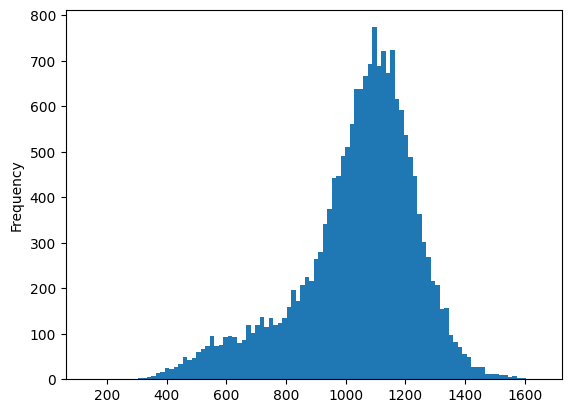

In [5]:
def print_moments(s):
    print(
        f"mean: {s.mean():.3f}, median: {s.median():.3f}, mode: {s.mode().to_list()[-1]:.3f}, "
        f"std: {s.std():.3f}, min: {s.min():.3f}, max: {s.max():.3f}"
        )

ann_df_trt = ann_df[ann_df.Metadata_pert_type == "trt"]
print_moments(ann_df_trt.Metadata_Count_Cells)
print("Replicate counts:\n", ann_df_trt.groupby("Metadata_JCP2022")["Metadata_Vector"].count().value_counts())
ann_df_trt.Metadata_Count_Cells.plot(kind="hist", bins=100)

#### Assess cell count variability per ORF by calculating the coefficient of variation

Considerations for using CoV:
- most (99%) of ORFs have exactly 5 replicates
- since the distribution is skewed, one should use DDoF=1

mean: 0.107, median: 0.081, mode: 0.524, std: 0.076, min: 0.009, max: 0.524


<Axes: ylabel='Frequency'>

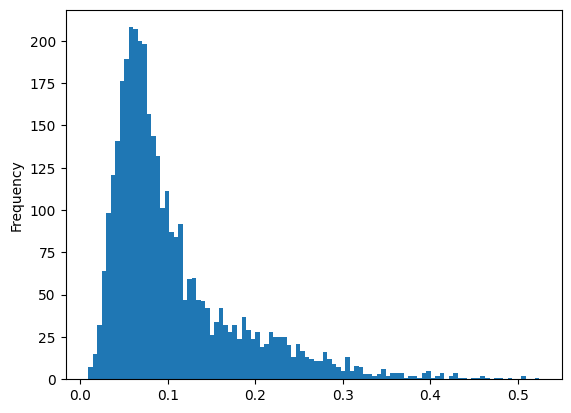

In [6]:
variation_ddof1 = partial(variation, ddof=1)
cell_count_cvar = ann_df_trt.groupby("Metadata_JCP2022")["Metadata_Count_Cells"].agg(variation_ddof1)

print_moments(cell_count_cvar)
cell_count_cvar.plot(kind="hist", bins=100)

2588


<Axes: ylabel='Frequency'>

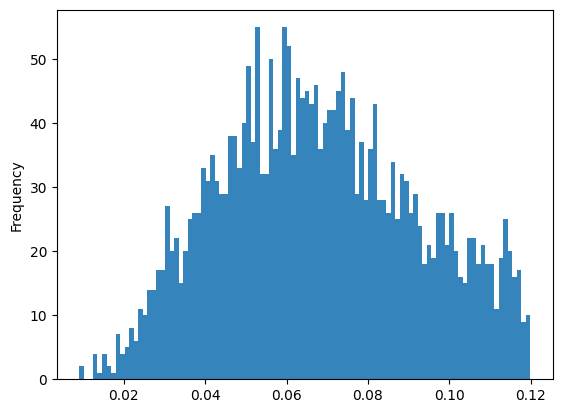

In [7]:
cutoff = 0.12

print((cell_count_cvar < cutoff).sum())
cell_count_cvar[cell_count_cvar < cutoff].plot(kind="hist", bins=100, alpha=0.9)

1028


<Axes: ylabel='Frequency'>

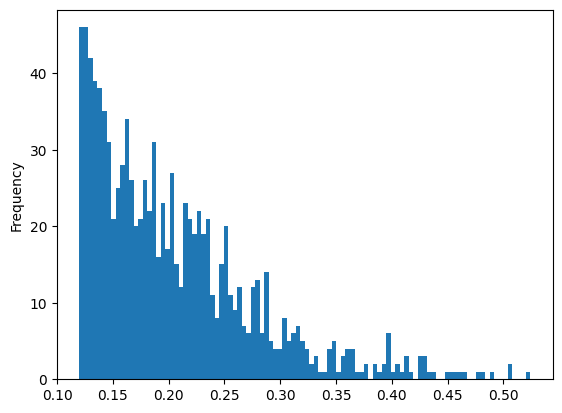

In [8]:
print((cell_count_cvar > cutoff).sum())
cell_count_cvar[cell_count_cvar > cutoff].plot(kind="hist", bins=100)

Low cell count variability (orange):
mean: 1097.754, median: 1107.000, mode: 1125.000, std: 146.644, min: 400.000, max: 1604.000
High cell count variability (blue):
mean: 893.835, median: 908.000, mode: 982.000, std: 238.358, min: 137.000, max: 1648.000


<Axes: ylabel='Frequency'>

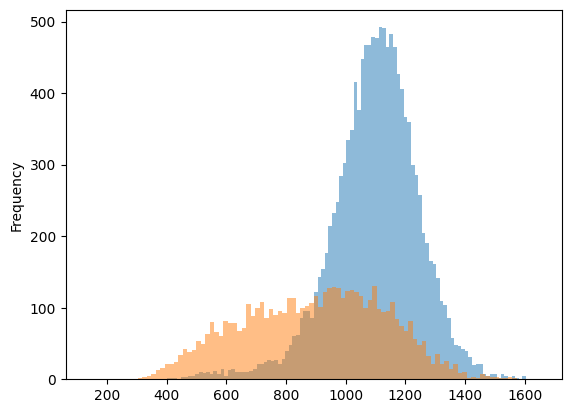

In [9]:
low_cvar_idx = cell_count_cvar[cell_count_cvar < cutoff].index
ann_df_trt_low_cvar = ann_df_trt.loc[ann_df_trt["Metadata_JCP2022"].isin(low_cvar_idx)]
ann_df_trt_high_cvar = ann_df_trt.loc[~ann_df_trt["Metadata_JCP2022"].isin(low_cvar_idx)]

print("Low cell count variability (orange):")
print_moments(ann_df_trt_low_cvar.Metadata_Count_Cells)
ann_df_trt_low_cvar.Metadata_Count_Cells.plot(kind="hist", bins=100, alpha=0.5)

print("High cell count variability (blue):")
print_moments(ann_df_trt_high_cvar.Metadata_Count_Cells)
ann_df_trt_high_cvar.Metadata_Count_Cells.plot(kind="hist", bins=100, alpha=0.5)

In [10]:
ann_df_trt_low_cvar.to_parquet("output/subset_profiles_low_cvar_metadata.parquet")

Metadata_JCP2022 Metadata_broad_sample         Metadata_Name  \
0       JCP2022_900006    ccsbBroad304_00008  ORF000425.1_TRC304.1   
1       JCP2022_900176    ccsbBroad304_00189  ORF011559.1_TRC304.1   
3       JCP2022_900294    ccsbBroad304_00321  ORF012872.1_TRC304.1   
4       JCP2022_900295    ccsbBroad304_00322  ORF012041.1_TRC304.1   
6       JCP2022_900392    ccsbBroad304_00423  ORF005089.1_TRC304.1   
...                ...                   ...                   ...   
19122   JCP2022_915014    ccsbBroad304_16053  ORF001543.1_TRC304.1   
19124   JCP2022_915024    ccsbBroad304_16064  ORF006054.1_TRC304.1   
19125   JCP2022_915028    ccsbBroad304_16068  ORF008706.1_TRC304.1   
19126   JCP2022_915030    ccsbBroad304_16070  ORF000807.1_TRC304.1   
19127   JCP2022_915053    ccsbBroad304_16093  ORF016633.1_TRC304.1   

      Metadata_Vector Metadata_Transcript Metadata_Symbol  \
0             pLX_304         NM_001095.4           ASIC1   
1             pLX_304         NM_000587.4              C7   
3             pLX_304         NM_001830.4           CLCN4   
4             pLX_304         NM_000084.5           CLCN5   
6             pLX_304         NM_001350.5            DAXX   
...               ...                 ...             ...   
19122         pLX_304         NM_033364.4          MAATS1   
19124         pLX_304      NM_001077594.1         EXOC3L4   
19125         pLX_304      NM_001286829.2           NAPRT   
19126         pLX_304         NM_144577.4         CCDC114   
19127         pLX_304         NM_139244.4          STXBP5   

      Metadata_NCBI_Gene_ID Metadata_Taxon_ID  \
0                        41              9606   
1                       730              9606   
3                      1183              9606   
4                      1184              9606   
6                      1616              9606   
...                     ...               ...   
19122                 89876              9606   
19124                 91828              9606   
19125                 93100              9606   
19126                 93233              9606   
19127                134957              9606   

                     Metadata_Gene_Description  Metadata_Prot_Match  \
0           acid sensing ion channel subunit 1                100.0   
1                                complement C7                100.0   
3             chloride voltage-gated channel 4                100.0   
4             chloride voltage-gated channel 5                100.0   
6              death domain associated protein                100.0   
...                                        ...                  ...   
19122  MYCBP associated and testis expressed 1                 99.8   
19124       exocyst complex component 3 like 4                 99.7   
19125     nicotinate phosphoribosyltransferase                 86.0   
19126        coiled-coil domain containing 114                 69.1   
19127               syntaxin binding protein 5                 99.9   

       Metadata_Insert_Length Metadata_pert_type Metadata_Source  \
0                      1584.0                trt        source_4   
1                      2529.0                trt        source_4   
3                      2280.0                trt        source_4   
4                      2238.0                trt        source_4   
6                      2220.0                trt        source_4   
...                       ...                ...             ...   
19122                  2301.0                trt        source_4   
19124                  2166.0                trt        source_4   
19125                  1398.0                trt        source_4   
19126                  1389.0                trt        source_4   
19127                  3345.0                trt        source_4   

      Metadata_Plate Metadata_Well Metadata_Plate_Map_Name  \
0         BR00126538           B21        OAB37.38.39.40.A   
1         BR00126538           I15        OAB37.3